# Projet ML

In [641]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Dataset classification

Immunotherapy Dataset

Link:
https://archive.ics.uci.edu/ml/datasets/Immunotherapy+Dataset?fbclid=IwAR3UvWjj_2qqoS-_bjMEWCnrSUNS-1LezCZk1G6yMLHf_lAbpO4DZ76VZO0

In [642]:
#Open the dataset with read_excel()
df = pd.read_excel("Immunotherapy.xlsx")

In [643]:
#Rename the features 
df.rename(
    columns={
        "sex": "Sex", 
        "age": "Age", 
        "Number_of_Warts": "Nbr_Warts",
        "induration_diameter": "Induration_diameter",
        "Result_of_Treatment": "Result", 
    },
    inplace = True
)

In [644]:
df

,Sex,Age,Time,Nbr_Warts,Type,Area,Induration_diameter,Result
0,1,22,2.25,14,3,51,50,1
1,1,15,3.00,2,3,900,70,1
2,1,16,10.50,2,1,100,25,1
3,1,27,4.50,9,3,80,30,1
4,1,20,8.00,6,1,45,8,1
...,...,...,...,...,...,...,...,...
85,1,40,5.50,8,3,69,5,1
86,1,38,7.50,8,2,56,45,1
87,1,46,11.50,4,1,91,25,0
88,1,32,12.00,9,1,43,50,0


In [645]:
# Data types of our dataframe
df.dtypes

Sex                      int64
Age                      int64
Time                   float64
Nbr_Warts                int64
Type                     int64
Area                     int64
Induration_diameter      int64
Result                   int64
dtype: object

In [646]:
# Pairwise Correlation of the features
df.corr()

,Sex,Age,Time,Nbr_Warts,Type,Area,Induration_diameter,Result
Sex,1.000000,0.043682,-0.014825,0.100785,-0.104623,-0.115664,0.015202,0.018831
Age,0.043682,1.000000,0.188981,0.000092,-0.056636,-0.064334,-0.007005,-0.188314
Time,-0.014825,0.188981,1.000000,0.050800,-0.262870,-0.047254,-0.183656,-0.361172
Nbr_Warts,0.100785,0.000092,0.050800,1.000000,0.148047,-0.107528,0.062383,-0.047160
Type,-0.104623,-0.056636,-0.262870,0.148047,1.000000,-0.042080,0.205546,0.083396
Area,-0.115664,-0.064334,-0.047254,-0.107528,-0.042080,1.000000,0.119262,0.043349
Induration_diameter,0.015202,-0.007005,-0.183656,0.062383,0.205546,0.119262,1.000000,-0.031273
Result,0.018831,-0.188314,-0.361172,-0.047160,0.083396,0.043349,-0.031273,1.000000


## Graphic Representation


<AxesSubplot:xlabel='Induration_diameter', ylabel='Result'>

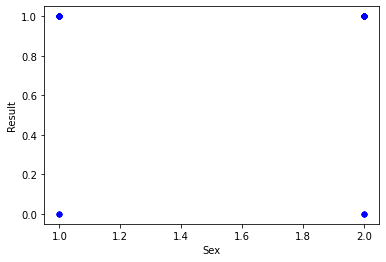

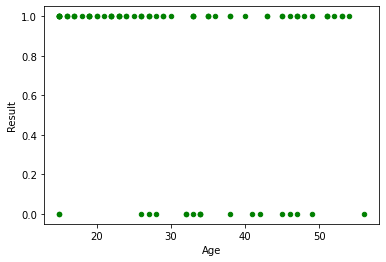

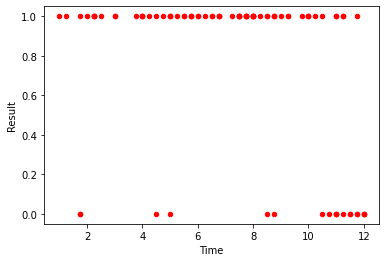

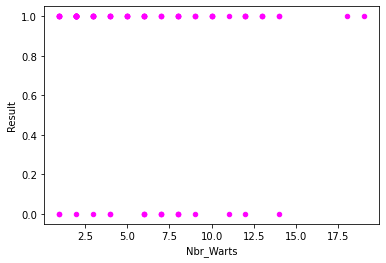

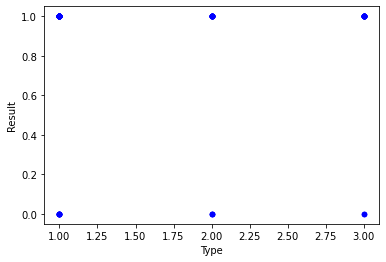

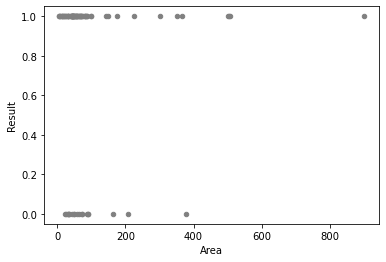

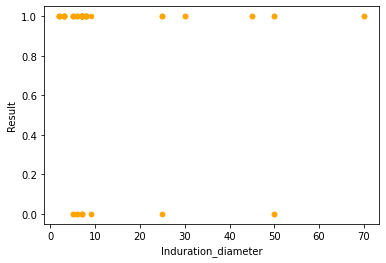

In [647]:
# Scatter plot of each feature
df.plot(kind = 'scatter', x = 'Sex', y = 'Result', color='blue')
df.plot(kind = 'scatter', x = 'Age', y = 'Result', color='green')
df.plot(kind = 'scatter', x = 'Time', y = 'Result', color='red')
df.plot(kind = 'scatter', x = 'Nbr_Warts', y = 'Result', color='magenta')
df.plot(kind = 'scatter', x = 'Type', y = 'Result', color='blue')
df.plot(kind = 'scatter', x = 'Area', y = 'Result', color='gray')
df.plot(kind = 'scatter', x = 'Induration_diameter', y = 'Result', color='orange')

# I- Preprocessing


# I.1- Missing values 

We use the commande df.isna().sum() to check if there are any missing values  


In [648]:
df.isna().sum()
# All the values are equal to zero, so there are no missing values

Sex                    0
Age                    0
Time                   0
Nbr_Warts              0
Type                   0
Area                   0
Induration_diameter    0
Result                 0
dtype: int64

# I.2- Removing Categorical values 

The features 'Sex' and 'Type' are of Categorical type , we have to transforme them to a numerical type


In [649]:
df.columns

Index(['Sex', 'Age', 'Time', 'Nbr_Warts', 'Type', 'Area',
       'Induration_diameter', 'Result'],
      dtype='object')

In [650]:
# We use the 'Dummies' methode:
dummies_Type = pd.get_dummies(df['Type'], prefix='Type', dummy_na=False)
dummies_Sex  = pd.get_dummies(df['Sex'], prefix='Sex', dummy_na=False)

In [651]:
print(dummies_Type.head(5))

   Type_1  Type_2  Type_3
0       0       0       1
1       0       0       1
2       1       0       0
3       0       0       1
4       1       0       0


In [652]:
dummies_Sex.rename(
    columns={
        "Sex_1": "Sex_M", 
        "Sex_2": "Sex_F", 
    },
    inplace = True
)

In [653]:
print(dummies_Sex.head(5))

   Sex_M  Sex_F
0      1      0
1      1      0
2      1      0
3      1      0
4      1      0


In [654]:
df = df.drop('Sex', 1)

C:\Users\user\AppData\Local\Temp/ipykernel_16580/3401346393.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop('Sex', 1)


In [655]:
df.head(5)

,Age,Time,Nbr_Warts,Type,Area,Induration_diameter,Result
0,22,2.25,14,3,51,50,1
1,15,3.00,2,3,900,70,1
2,16,10.50,2,1,100,25,1
3,27,4.50,9,3,80,30,1
4,20,8.00,6,1,45,8,1


In [656]:
df = df.drop('Type', 1)

C:\Users\user\AppData\Local\Temp/ipykernel_16580/2018126150.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop('Type', 1)


In [657]:
df.head(5)

,Age,Time,Nbr_Warts,Area,Induration_diameter,Result
0,22,2.25,14,51,50,1
1,15,3.00,2,900,70,1
2,16,10.50,2,100,25,1
3,27,4.50,9,80,30,1
4,20,8.00,6,45,8,1


In [658]:
#We merge all the features 
df = pd.concat([dummies_Sex, df.Age, df.Time, df.Nbr_Warts, dummies_Type, df.Area, df.Induration_diameter, df.Result], axis=1)

In [659]:
df

,Sex_M,Sex_F,Age,Time,Nbr_Warts,Type_1,Type_2,Type_3,Area,Induration_diameter,Result
0,1,0,22,2.25,14,0,0,1,51,50,1
1,1,0,15,3.00,2,0,0,1,900,70,1
2,1,0,16,10.50,2,1,0,0,100,25,1
3,1,0,27,4.50,9,0,0,1,80,30,1
4,1,0,20,8.00,6,1,0,0,45,8,1
...,...,...,...,...,...,...,...,...,...,...,...
85,1,0,40,5.50,8,0,0,1,69,5,1
86,1,0,38,7.50,8,0,1,0,56,45,1
87,1,0,46,11.50,4,1,0,0,91,25,0
88,1,0,32,12.00,9,1,0,0,43,50,0


# I.3- Detecting Outliers


In [660]:
#We use z_score methode to detecte the outliers: 
def detect_outliers(data):
    outliers=[]
    threshold = 3
    mean = np.mean(data)
    std  = np.std(data)  
    
    for i in data:
        z_score = (i-mean)/std
        if np.abs(z_score)>threshold:
            outliers.append(i)
    
    return outliers

In [661]:
detect_outliers(df['Nbr_Warts'])

[19]

In [662]:
detect_outliers(df['Area'])

[900, 504, 507]

In [663]:
detect_outliers(df['Induration_diameter'])

[70, 70, 70]

In [664]:
#The other features have been tested and they don't contain outliers
df_outliers = df[df['Nbr_Warts'] == 19].append(df[df['Area'] == 900]).append(df[df['Area'] == 504]).append(df[df['Area'] == 507]).append(df[df['Induration_diameter'] == 70])
df_outliers = df_outliers.drop_duplicates()
df_outliers = df_outliers.sort_index()
df_outliers

,Sex_M,Sex_F,Age,Time,Nbr_Warts,Type_1,Type_2,Type_3,Area,Induration_diameter,Result
1,1,0,15,3.00,2,0,0,1,900,70,1
18,0,1,15,6.50,19,1,0,0,56,7,1
31,1,0,23,3.00,2,0,0,1,87,70,1
37,1,0,29,8.75,3,1,0,0,504,2,1
61,0,1,19,2.25,8,0,1,0,42,70,1
78,1,0,43,11.00,7,1,0,0,507,7,1


In [665]:
#Suppression of the outliers from the dataframe
df = df.drop(labels=[1,18,31,37,61,78], axis=0)
df.index = np.arange(0, len(df))
df

,Sex_M,Sex_F,Age,Time,Nbr_Warts,Type_1,Type_2,Type_3,Area,Induration_diameter,Result
0,1,0,22,2.25,14,0,0,1,51,50,1
1,1,0,16,10.50,2,1,0,0,100,25,1
2,1,0,27,4.50,9,0,0,1,80,30,1
3,1,0,20,8.00,6,1,0,0,45,8,1
4,1,0,15,5.00,3,0,0,1,84,7,1
...,...,...,...,...,...,...,...,...,...,...,...
79,1,0,40,5.50,8,0,0,1,69,5,1
80,1,0,38,7.50,8,0,1,0,56,45,1
81,1,0,46,11.50,4,1,0,0,91,25,0
82,1,0,32,12.00,9,1,0,0,43,50,0


# I.4- Feature scaling (Normalisation)


In [666]:
from sklearn.preprocessing import MinMaxScaler # To make all values of features between 0 and 1
S = MinMaxScaler()
dfScale = S.fit_transform(df)
dfScale = pd.DataFrame(dfScale)
dfScale.columns = df.columns
dfScale = dfScale.astype({"Sex_M": int, "Sex_F": int, "Type_1": int, "Type_2": int, "Type_3": int, "Result" : int})
df = dfScale
df

,Sex_M,Sex_F,Age,Time,Nbr_Warts,Type_1,Type_2,Type_3,Area,Induration_diameter,Result
0,1,0,0.170732,0.113636,0.764706,0,0,1,0.090726,1.000000,1
1,1,0,0.024390,0.863636,0.058824,1,0,0,0.189516,0.479167,1
2,1,0,0.292683,0.318182,0.470588,0,0,1,0.149194,0.583333,1
3,1,0,0.121951,0.636364,0.294118,1,0,0,0.078629,0.125000,1
4,1,0,0.000000,0.363636,0.117647,0,0,1,0.157258,0.104167,1
...,...,...,...,...,...,...,...,...,...,...,...
79,1,0,0.609756,0.409091,0.411765,0,0,1,0.127016,0.062500,1
80,1,0,0.560976,0.590909,0.411765,0,1,0,0.100806,0.895833,1
81,1,0,0.756098,0.954545,0.176471,1,0,0,0.171371,0.479167,0
82,1,0,0.414634,1.000000,0.470588,1,0,0,0.074597,1.000000,0


# II- Gradient Descent

In [667]:
#def of the input and output
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

#devision of the dataset into training part and testing part
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size=0.2,random_state=10)

In [668]:
#reshaping
X_train = X_train.T
Y_train = Y_train.reshape(1, X_train.shape[1])

X_test = X_test.T
Y_test = Y_test.reshape(1, X_test.shape[1])

In [669]:
#def of the sigmoid function
def sigmoid(x):
    return 1/(1 + np.exp(-x))

In [670]:
#def of the hypothesis
def lr_hypothesis(x, theta):
    return np.dot(theta.T, x)

In [671]:
#def of the cost function
def compute_cost(Y, A):
    m = X_train.shape[1]
    cost = -(1/m)*np.sum(Y*np.log(A) + (1-Y)*np.log(1-A))
    return cost

In [672]:
#perform Gradient Descent
def gradientDescent(X, Y, alpha, iterations):
    
    CostVect = []
    m = X_train.shape[1]
    n = X_train.shape[0]
    
    theta = np.zeros((n,1))
    B = 0
    
    for i in range(iterations):
        
        Z = lr_hypothesis(X, theta) + B
        A = sigmoid(Z)
        
        cost = compute_cost(Y, A)
        
        dW = (1/m)*np.dot(A-Y, X.T)
        dB =  (1/m)*np.sum(A-Y)
        
        theta = theta - alpha*dW.T
        B = B - alpha*dB
        
        CostVect.append(cost)
        
        if(i%(iterations/10) == 0):
            print("cost after ", i, "iterations is : ", cost)
    print("Value of cost at the end of the Gradient Descent : ",cost)
    return theta, B, CostVect

In [673]:
iterations = 200
alpha = 0.6

#cost = 0.5294313911641758       when alpha = 0.1
#cost = 0.502343869457735       when alpha = 0.2
#cost = 0.4762595806654188        when alpha = 0.4
#cost = 0.4643660555916679        when alpha = 0.6

#cost = 0.5143192089757856       with iterations = 50
#cost = 0.4865972648764586        with iterations = 100
#cost = 0.472490450008231        with iterations = 150
#cost = 0.4643660555916679       with iterations = 200

#if we go further than alpha = 0.6, we will later have a worst % of accuracy in our testing so 0.6 is a good value to stop at

#exp :
        #alpha = 0.6  ==>  Accuracy of the model is :  88.23529411764706 %
        #alpha = 0.7  ==>  Accuracy of the model is :  82.35294117647058 %

In [674]:
#here we can see the decrease of the value of the cost and the last value of the cost at the end of the Gradient Descent
theta, B, CostVect = gradientDescent(X_train, Y_train, alpha, iterations)

cost after  0 iterations is :  0.6931471805599454
cost after  20 iterations is :  0.5463182712511067
cost after  40 iterations is :  0.5222257919392342
cost after  60 iterations is :  0.5062457075454159
cost after  80 iterations is :  0.49478773216488886
cost after  100 iterations is :  0.4862218048679763
cost after  120 iterations is :  0.47963514332125523
cost after  140 iterations is :  0.47446159004740857
cost after  160 iterations is :  0.47032892204445775
cost after  180 iterations is :  0.46698222770241343
Value of cost at the end of the Gradient Descent :  0.4643660555916679


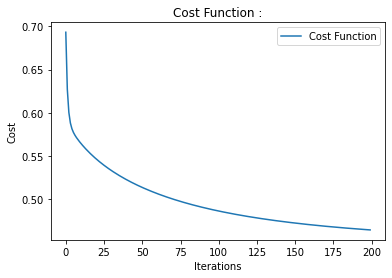

In [675]:
%matplotlib inline

t= np.arange(0,iterations,1)
plt.plot(t,CostVect, label = "Cost Function")

plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function :')
plt.legend()

plt.show()

In [676]:
#def of the accuracy functuion to mesure the accuracy of our model
def accuracy(X, Y, theta, B):
    Z = lr_hypothesis(X, theta) + B
    A = sigmoid(Z)
    
    A = A > 0.5
    
    A = np.array(A, dtype = 'int64')
    
    acc = (1 - np.sum(np.absolute(A - Y))/Y.shape[1])*100
    
    print("Accuracy of the model is : ",acc, "%")

In [677]:
accuracy(X_test, Y_test, theta, B)

Accuracy of the model is :  88.23529411764706 %


### Verification of the result :

We can now compare the result we got (accuracy) with the result given by the functions provided by 'sklearn'.

In [678]:
y = df['Result']
x=df.drop('Result', axis=1)

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size=0.2,random_state=10)

from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,Y_train)
prediction = logmodel.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy_score(Y_test,prediction)

#we can see that the accuracy is the same :

0.8823529411764706

# IV- Decision Trees

In [679]:
feature_names=['Sex_M', 'Sex_F', 'Age', 'Time', 'Nbr_Warts', 'Type_1', 'Type_2','Type_3', 'Area',
               'Induration_diameter']
df[feature_names]

,Sex_M,Sex_F,Age,Time,Nbr_Warts,Type_1,Type_2,Type_3,Area,Induration_diameter
0,1,0,0.170732,0.113636,0.764706,0,0,1,0.090726,1.000000
1,1,0,0.024390,0.863636,0.058824,1,0,0,0.189516,0.479167
2,1,0,0.292683,0.318182,0.470588,0,0,1,0.149194,0.583333
3,1,0,0.121951,0.636364,0.294118,1,0,0,0.078629,0.125000
4,1,0,0.000000,0.363636,0.117647,0,0,1,0.157258,0.104167
...,...,...,...,...,...,...,...,...,...,...
79,1,0,0.609756,0.409091,0.411765,0,0,1,0.127016,0.062500
80,1,0,0.560976,0.590909,0.411765,0,1,0,0.100806,0.895833
81,1,0,0.756098,0.954545,0.176471,1,0,0,0.171371,0.479167
82,1,0,0.414634,1.000000,0.470588,1,0,0,0.074597,1.000000


In [680]:
# Training and Testing Data Sets

from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(df[feature_names],
df['Result'], test_size=0.2, random_state=0) 

#after trying many test-sizes, 0.2 gave the best test accuracy
#test_size=0.4 : 100.0 % 91.18 %
#test_size=0.35: 98.15 % 93.33 %
#test_size=0.3 : 98.28 % 92.31 %
#test_size=0.25: 100.0 % 80.95 %
#test_size=0.2 : 98.51 % 94.12 %  #Best
#test_size=0.15: 98.59 % 92.31 %
#test_size=0.1 : 98.67 % 88.89 %


In [681]:
#Size of train and test sets
print("X_train shape: {}".format(X_train.shape)) 
print("y_train shape: {}".format(y_train.shape))

print("X_test shape: {}".format(X_test.shape)) 
print("y_test shape: {}".format(y_test.shape))

X_train shape: (67, 10)
y_train shape: (67,)
X_test shape: (17, 10)
y_test shape: (17,)


In [682]:
# Build and train our Decision Tree

from sklearn.tree import DecisionTreeClassifier # The DT Algorithm in sckit-learn

from sklearn import tree

D_Tree = DecisionTreeClassifier(max_depth = 6, random_state = 0) # Max depth is 6

D_Tree.fit(X_train, y_train) # Build the tree using the training set

DecisionTreeClassifier(max_depth=6, random_state=0)

In [683]:
#Accuracy of the train and test sets
from sklearn import metrics

prediction_Train = D_Tree.predict(X_train)
print('The Train Accuracy of the DT is: %.2f' % (metrics.accuracy_score(prediction_Train,y_train) * 100))

prediction_Test = D_Tree.predict(X_test)
print('The Test Accuracy of the DT is: %.2f' % (metrics.accuracy_score(prediction_Test,y_test)* 100))


The Train Accuracy of the DT is: 100.00
The Test Accuracy of the DT is: 94.12


In [684]:
# Text representation of the decision tree
from sklearn.tree import export_text

text_representation = export_text(D_Tree,feature_names=feature_names)

print(text_representation)

|--- Time <= 0.85
|   |--- Type_2 <= 0.50
|   |   |--- Age <= 0.45
|   |   |   |--- class: 1
|   |   |--- Age >  0.45
|   |   |   |--- Age <= 0.48
|   |   |   |   |--- class: 0
|   |   |   |--- Age >  0.48
|   |   |   |   |--- Area <= 0.06
|   |   |   |   |   |--- Type_1 <= 0.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- Type_1 >  0.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- Area >  0.06
|   |   |   |   |   |--- class: 1
|   |--- Type_2 >  0.50
|   |   |--- Time <= 0.33
|   |   |   |--- class: 0
|   |   |--- Time >  0.33
|   |   |   |--- Area <= 0.13
|   |   |   |   |--- class: 1
|   |   |   |--- Area >  0.13
|   |   |   |   |--- Time <= 0.73
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Time >  0.73
|   |   |   |   |   |--- class: 1
|--- Time >  0.85
|   |--- Nbr_Warts <= 0.26
|   |   |--- Age <= 0.30
|   |   |   |--- class: 1
|   |   |--- Age >  0.30
|   |   |   |--- class: 0
|   |--- Nbr_Warts >  0.26
|   |   |--- class: 0



##  Feature importance in the Decision Tree :

Feature importance rates how important each feature is for the decision a tree makes. 


In [685]:
print("Feature importances:\n{}".format(D_Tree.feature_importances_))

Feature importances:
[0.         0.         0.20312393 0.54773699 0.06631787 0.04105392
 0.05432777 0.         0.08743952 0.        ]


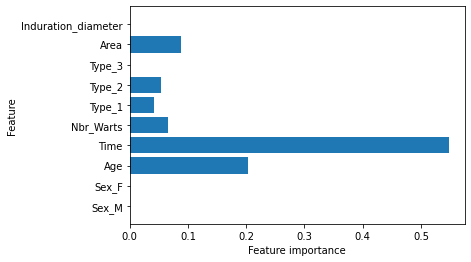

In [686]:
def plot_feature_importances(model):
    n_features = 10
    plt.barh([0,1,2,3,4,5,6,7,8,9], model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), feature_names) 
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
plot_feature_importances(D_Tree)

<AxesSubplot:xlabel='Time', ylabel='Result'>

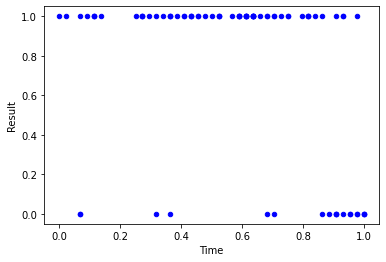

In [687]:
#Scatter plot of the most important feature 'Time'
df.plot(kind = 'scatter', x = 'Time', y = 'Result', color='blue')

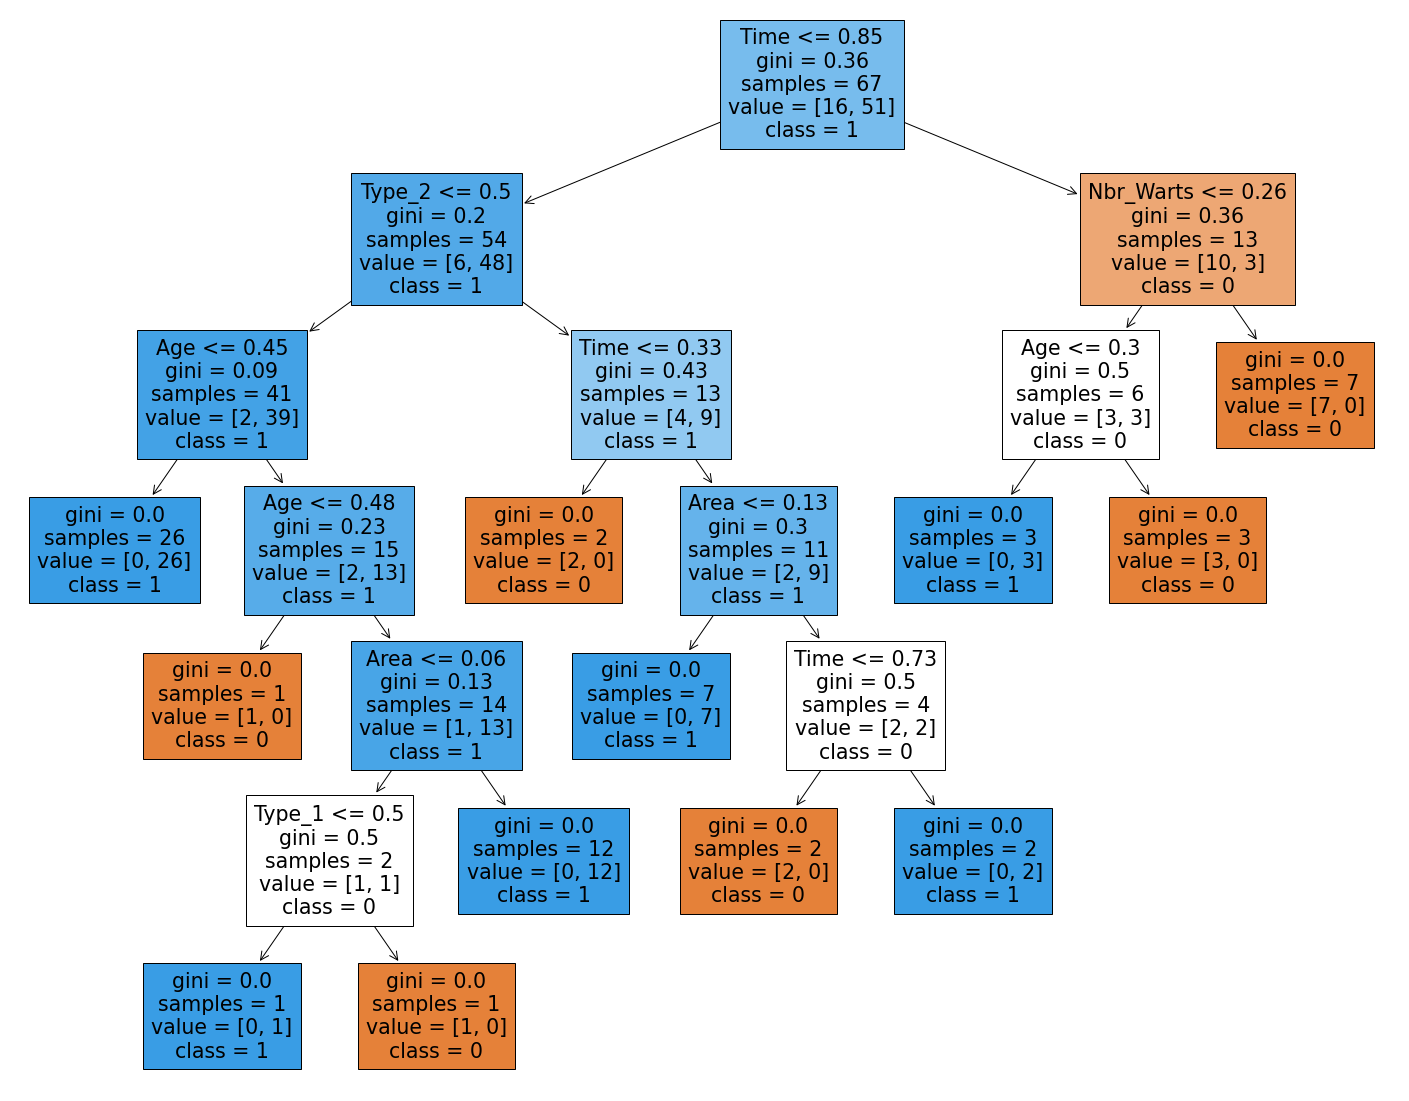

In [688]:
#Decision Tree Plot
figure = plt.figure(figsize=(25,20))
_ = tree.plot_tree(D_Tree, 
                   feature_names = feature_names,  
                   class_names   = ['0','1'],
                   filled = True,
                   precision = 2)